# Pushkal Ojha
# 220968422
# Batch B2
# Roll no: 69

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import tabulate
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score,KFold

## Importing Dataset

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [5]:
new_col = {'1000025':'Id', '5':'Clump_thickness', '1':'Uniformity_Cell_Size', '1.1':'Uniformity_Cell_Shape', '1.2':'Marginal_Adhesion', '2':'Single_Epithelial_Cell_Size', '1.3':'Bare_Nuclei', '3':'Bland_Chromatin', '1.4':'Normal_Nucleoli', '1.5':'Mitoses',
       '2.1':'Class'}

In [6]:
df = df.rename(columns = new_col)


In [7]:
df.corr()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.060082,-0.052188,-0.034961,-0.080378
Clump_thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
Uniformity_Cell_Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
Uniformity_Cell_Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618
Bland_Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.344118,0.428185,1.000000,0.423008
Class,-0.080378,0.716509,0.817772,0.818794,0.696605,0.682618,0.756732,0.712067,0.423008,1.000000


In [8]:
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
df.drop(columns = ['Id','Uniformity_Cell_Shape'],inplace = True)

In [10]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Marginal_Adhesion            698 non-null    int64 
 3   Single_Epithelial_Cell_Size  698 non-null    int64 
 4   Bare_Nuclei                  698 non-null    object
 5   Bland_Chromatin              698 non-null    int64 
 6   Normal_Nucleoli              698 non-null    int64 
 7   Mitoses                      698 non-null    int64 
 8   Class                        698 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [12]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace('\?',0, regex=True)

In [13]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              698 non-null    int64
 1   Uniformity_Cell_Size         698 non-null    int64
 2   Marginal_Adhesion            698 non-null    int64
 3   Single_Epithelial_Cell_Size  698 non-null    int64
 4   Bare_Nuclei                  698 non-null    int64
 5   Bland_Chromatin              698 non-null    int64
 6   Normal_Nucleoli              698 non-null    int64
 7   Mitoses                      698 non-null    int64
 8   Class                        698 non-null    int64
dtypes: int64(9)
memory usage: 49.2 KB


In [15]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,2.809456,3.217765,3.467049,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.856606,2.215408,3.642122,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace(0,df['Bare_Nuclei'].median(), regex=True)

In [17]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,2.809456,3.217765,3.489971,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.856606,2.215408,3.623301,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [18]:
df.dtypes

Clump_thickness                int64
Uniformity_Cell_Size           int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [19]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

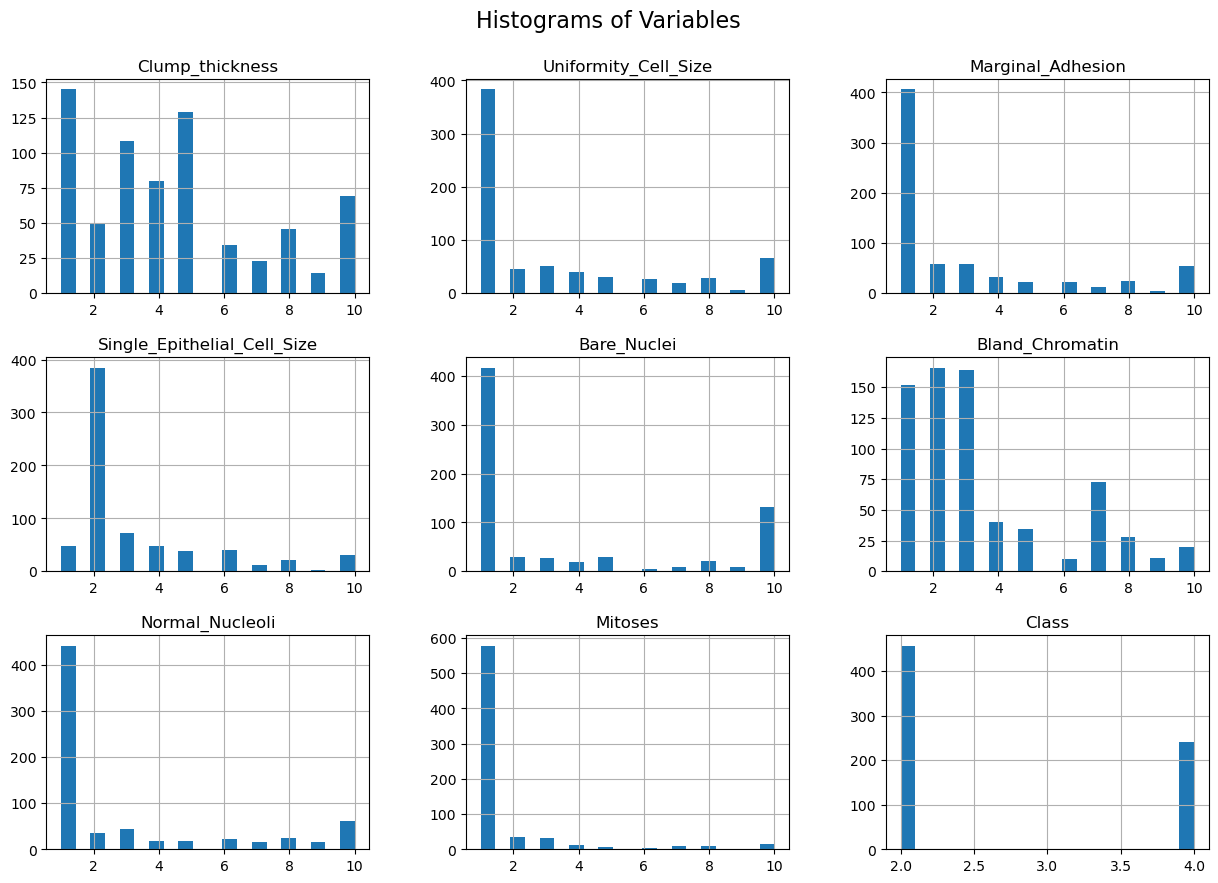

In [20]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Variables', y=0.95, fontsize=16)
plt.show()

In [21]:
correlation_matrix = df.corr()

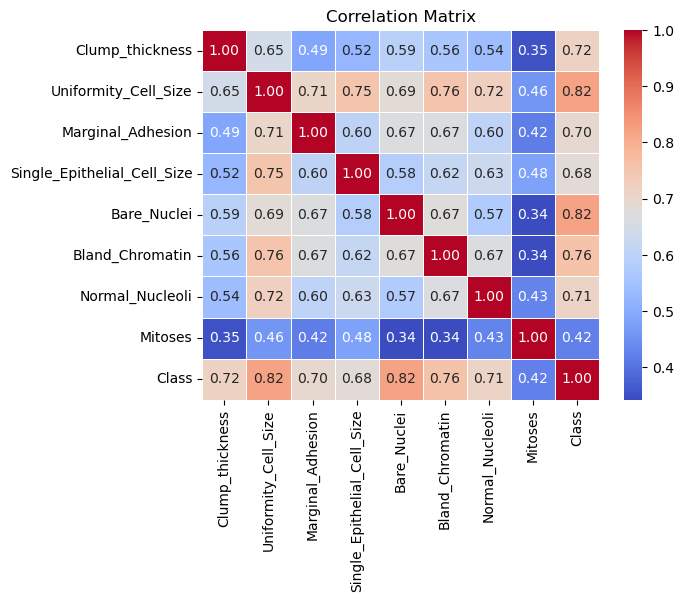

In [22]:
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',fmt = ".2f",linewidth = .5)
plt.title("Correlation Matrix")
plt.show()

In [23]:
X = df.drop(columns = 'Class')
y = df['Class']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [25]:
scaler = StandardScaler()

In [26]:
df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [27]:
numerical_cols = ['Clump_thickness', 'Uniformity_Cell_Size', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']

In [28]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [29]:
k_neighbors = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
y_pred = knn_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
acc = accuracy_score(y_test,y_pred)
acc

0.9785714285714285

In [32]:
print(knn_classifier.score(X_test,y_test))
print(knn_classifier.score(X_train,y_train))

0.9785714285714285
0.974910394265233


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [33]:
acc_list = []
cr_list = []
k = []
for i in range (3,10):
    k.append(i)
    k_neighbors = i 
    knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    classification_rep = classification_report(y_test,y_pred)
    cr_list.append(classification_rep)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [34]:
table = [
    ["K value",k],
    ["Accuracy", acc_list],
    ["Classification Report",cr_list]
]

In [35]:
tabulate.tabulate(table,headers = ['Metric','Value'],tablefmt = "pretty")

"+-----------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
k_neighbors = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
y_pred = knn_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
cm = metrics.confusion_matrix(y_test,y_pred)

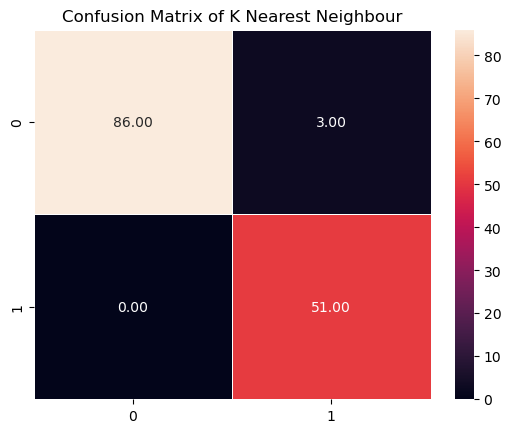

In [39]:
sns.heatmap(cm,annot = True,fmt = ".2f",linewidth = .5)
plt.title("Confusion Matrix of K Nearest Neighbour")
plt.show()

In [40]:
classification_rep = classification_report(y_test,y_pred)

In [41]:
classification_rep

'              precision    recall  f1-score   support\n\n           2       1.00      0.97      0.98        89\n           4       0.94      1.00      0.97        51\n\n    accuracy                           0.98       140\n   macro avg       0.97      0.98      0.98       140\nweighted avg       0.98      0.98      0.98       140\n'

In [42]:
y_pred = knn_classifier.predict_proba(X_test)[:,1]

In [43]:
y_test.unique()

array([4, 2], dtype=int64)

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 4)

### Plotting ROC Curve

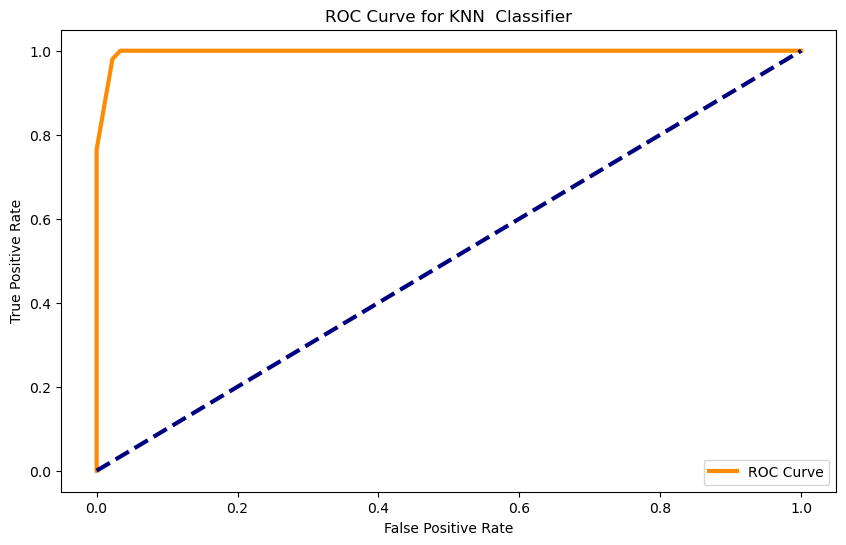

In [45]:
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 3, label = 'ROC Curve')
plt.plot([0,1], [0,1], color = 'navy', lw = 3, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN  Classifier")
plt.legend(loc = 'lower right')
plt.show()

In [46]:
kf = KFold(n_splits = 5,shuffle=True,random_state=42)

In [47]:
cv_res = cross_val_score(knn_classifier, X, y, cv = kf, scoring = 'accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [48]:
print(f"Accuracy for every fold : {cv_res}")
print(f"Mean Accuracy : {np.mean(cv_res)}")

Accuracy for every fold : [0.97857143 0.95714286 0.97142857 0.95683453 0.97122302]
Mean Accuracy : 0.9670400822199383


In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 4)

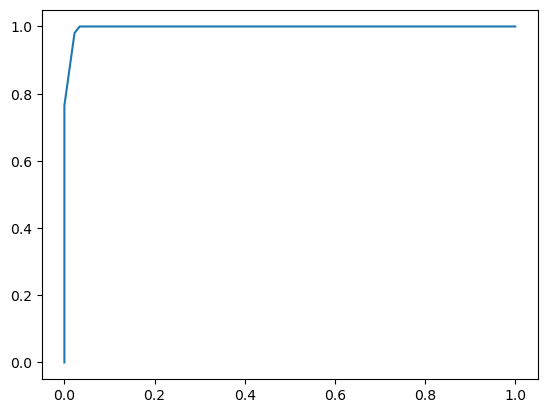

In [53]:
plt.plot(fpr, tpr)
#plt.plot([0, 1], [0,1], linestyle = '--')

In [55]:
roc_auc_score(y_test, y_pred)

0.9970257766027759

In [77]:
knn = KNeighborsClassifier(n_neighbors = 100)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [79]:
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [80]:
acc = accuracy_score(y_test, y_pred)

In [81]:
acc

0.9571428571428572

In [82]:
sc = StandardScaler()

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df['Uniformity_Cell_Size'] = sc.fit_transform(df['Uniformity_Cell_Size'].values.reshape(-1, 1))


In [89]:
from sklearn.preprocessing import OneHotEncoder


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

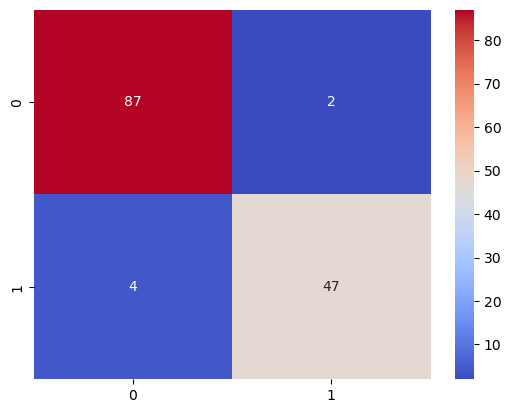

In [93]:
sns.heatmap(cm, annot=True, cmap = 'coolwarm')